In [1]:
# ========== STEP 1: Import Libraries and Load Data ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


# Load dataset
df = pd.read_csv('data/sales_data_sample.csv', encoding='latin1')
print("Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Select features for clustering
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']
data = df[features].dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print(f"\n{len(data)} records ready for clustering with {len(features)} features")

Dataset loaded successfully!
Shape: (2823, 25)

First 5 rows:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN         

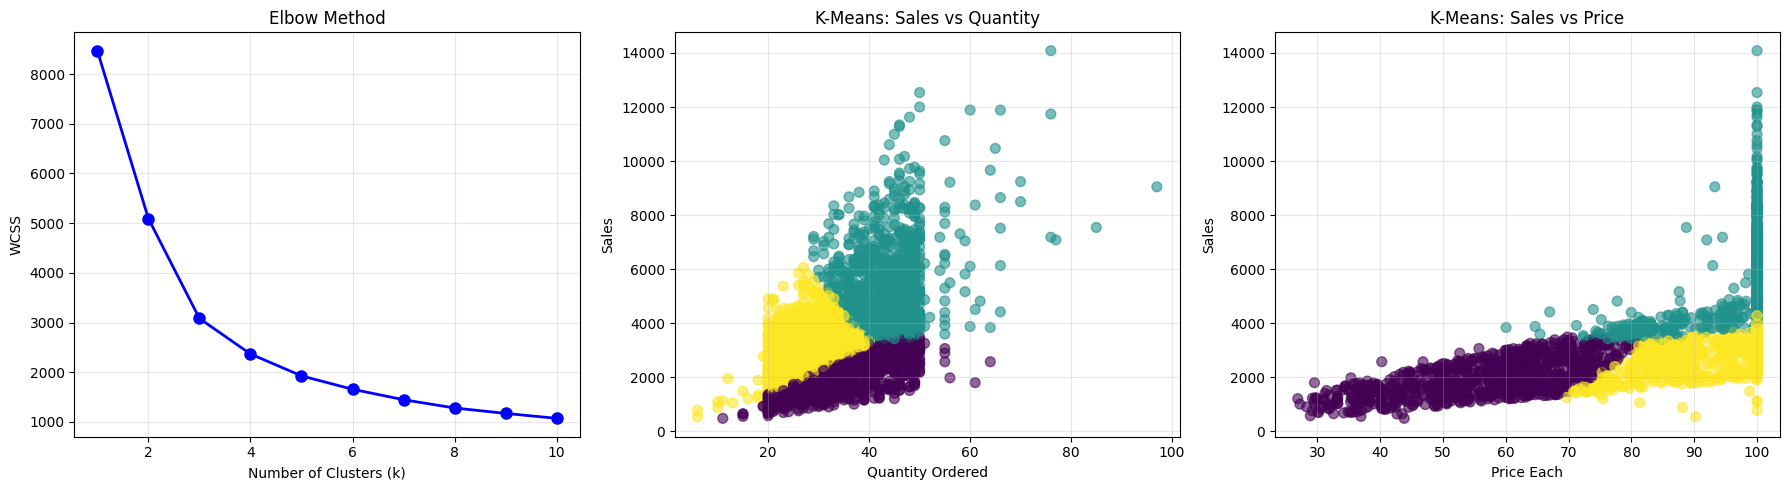

K-Means Clustering: 3 clusters

Cluster sizes:
KMeans_Cluster
0     881
1     907
2    1035
Name: count, dtype: int64


In [6]:
# ========== STEP 2: K-Means Clustering with Elbow Method ==========

# Find optimal k using Elbow Method
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Apply K-Means with optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)
data['KMeans_Cluster'] = clusters

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow plot
axes[0].plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('WCSS')
axes[0].set_title('Elbow Method')
axes[0].grid(True, alpha=0.3)

# Cluster visualizations
axes[1].scatter(data['QUANTITYORDERED'], data['SALES'], c=clusters, cmap='viridis', s=50, alpha=0.6)
axes[1].set_xlabel('Quantity Ordered')
axes[1].set_ylabel('Sales')
axes[1].set_title('K-Means: Sales vs Quantity')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(data['PRICEEACH'], data['SALES'], c=clusters, cmap='viridis', s=50, alpha=0.6)
axes[2].set_xlabel('Price Each')
axes[2].set_ylabel('Sales')
axes[2].set_title('K-Means: Sales vs Price')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"K-Means Clustering: {optimal_k} clusters")
print("\nCluster sizes:")
print(data['KMeans_Cluster'].value_counts().sort_index())

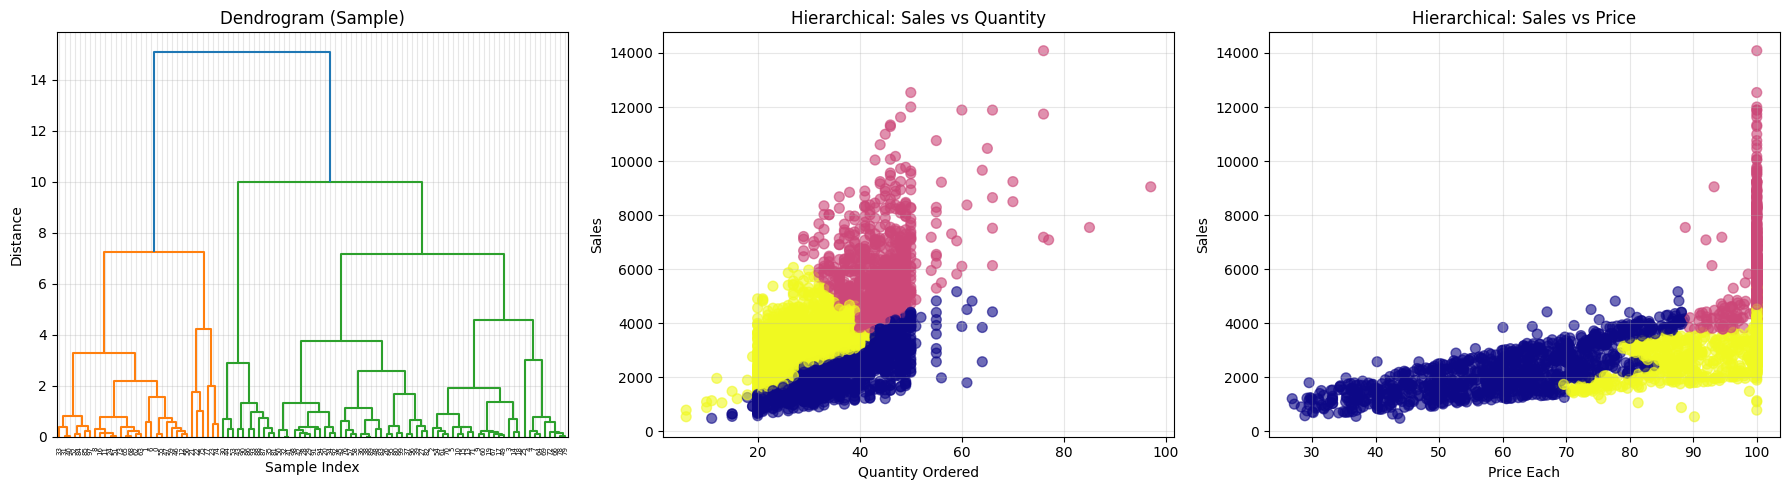

Hierarchical Clustering: 3 clusters

Cluster sizes:
Hierarchical_Cluster
0    1014
1     685
2    1124
Name: count, dtype: int64


In [3]:
# ========== STEP 3: Hierarchical Clustering ==========

# Create dendrogram (using sample for better visualization)
sample_size = min(100, len(data_scaled))
linkage_matrix = linkage(data_scaled[:sample_size], method='ward')

# Apply Hierarchical Clustering
n_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hc_clusters = hierarchical.fit_predict(data_scaled)
data['Hierarchical_Cluster'] = hc_clusters

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Dendrogram
dendrogram(linkage_matrix, ax=axes[0])
axes[0].set_title('Dendrogram (Sample)')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Distance')
axes[0].grid(True, alpha=0.3)

# Cluster visualizations
axes[1].scatter(data['QUANTITYORDERED'], data['SALES'], c=hc_clusters, cmap='plasma', s=50, alpha=0.6)
axes[1].set_xlabel('Quantity Ordered')
axes[1].set_ylabel('Sales')
axes[1].set_title('Hierarchical: Sales vs Quantity')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(data['PRICEEACH'], data['SALES'], c=hc_clusters, cmap='plasma', s=50, alpha=0.6)
axes[2].set_xlabel('Price Each')
axes[2].set_ylabel('Sales')
axes[2].set_title('Hierarchical: Sales vs Price')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Hierarchical Clustering: {n_clusters} clusters")
print("\nCluster sizes:")
print(data['Hierarchical_Cluster'].value_counts().sort_index())

In [4]:
# ========== STEP 4: Summary and Comparison ==========

print("="*70)
print("CLUSTERING RESULTS SUMMARY")
print("="*70)

# Comparison table
comparison = pd.DataFrame({
    'K-Means': data['KMeans_Cluster'].value_counts().sort_index(),
    'Hierarchical': data['Hierarchical_Cluster'].value_counts().sort_index()
})
print("\nCluster Size Comparison:")
print(comparison)

# K-Means cluster statistics
print("\n" + "="*70)
print("K-MEANS CLUSTER STATISTICS")
print("="*70)
for i in range(optimal_k):
    cluster_data = data[data['KMeans_Cluster'] == i][features]
    print(f"\nCluster {i} (n={len(cluster_data)}):")
    print(f"  Avg Quantity: {cluster_data['QUANTITYORDERED'].mean():.2f}")
    print(f"  Avg Price: ${cluster_data['PRICEEACH'].mean():.2f}")
    print(f"  Avg Sales: ${cluster_data['SALES'].mean():.2f}")

# Hierarchical cluster statistics
print("\n" + "="*70)
print("HIERARCHICAL CLUSTER STATISTICS")
print("="*70)
for i in range(n_clusters):
    cluster_data = data[data['Hierarchical_Cluster'] == i][features]
    print(f"\nCluster {i} (n={len(cluster_data)}):")
    print(f"  Avg Quantity: {cluster_data['QUANTITYORDERED'].mean():.2f}")
    print(f"  Avg Price: ${cluster_data['PRICEEACH'].mean():.2f}")
    print(f"  Avg Sales: ${cluster_data['SALES'].mean():.2f}")

print("\n" + "="*70)
print("CLUSTERING COMPLETE!")
print("="*70)

CLUSTERING RESULTS SUMMARY

Cluster Size Comparison:
   K-Means  Hierarchical
0      881          1014
1      907           685
2     1035          1124

K-MEANS CLUSTER STATISTICS

Cluster 0 (n=881):
  Avg Quantity: 35.13
  Avg Price: $57.13
  Avg Sales: $2009.83

Cluster 1 (n=907):
  Avg Quantity: 43.85
  Avg Price: $96.64
  Avg Sales: $5584.01

Cluster 2 (n=1035):
  Avg Quantity: 27.39
  Avg Price: $94.87
  Avg Sales: $3089.15

HIERARCHICAL CLUSTER STATISTICS

Cluster 0 (n=1014):
  Avg Quantity: 36.58
  Avg Price: $60.35
  Avg Sales: $2238.07

Cluster 1 (n=685):
  Avg Quantity: 44.08
  Avg Price: $99.45
  Avg Sales: $6081.75

Cluster 2 (n=1124):
  Avg Quantity: 28.27
  Avg Price: $95.06
  Avg Sales: $3200.38

CLUSTERING COMPLETE!
